In [1]:
using Plots, DifferentialEquations, StaticArrays

In [2]:
function diffeq_euler(initial_conditions, time_span, params; solver_args...)
    function _differential_system(u, p, t)
        ϕ, θ, ψ, ω_x, ω_y, ω_z = u
        J_x, J_y, J_z, M_x, M_y, M_z = p
        
        return SA[
            ω_x + ω_z * tan(θ)*cos(ϕ) + ω_y*tan(θ)*sin(ϕ),
            ω_y*cos(ϕ) - ω_z*sin(ϕ),
            ω_z*sec(θ)*cos(ϕ) + ω_y*sec(θ)*sin(ϕ),
            (M_x(u, p, t) + (J_y - J_z) * ω_y * ω_z) / J_x,
            (M_y(u, p, t) + (J_z - J_x) * ω_x * ω_z) / J_y,
            (M_z(u, p, t) + (J_x - J_y) * ω_x * ω_y) / J_z
        ]
    end

    problem = ODEProblem(_differential_system, initial_conditions, time_span, params)
    solution = solve(problem; solver_args...)

    return solution
end

diffeq_euler (generic function with 1 method)

In [3]:
M0(u, p, t) = 0
M_const(u, p, t) = 0.1

init = SA[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

tspan = SA[0.0, 5*60.0]

params = [100.0, 100.0, 100.0, M_const, M0, M0]

sol = diffeq_euler(init, tspan, params);

In [4]:
times = LinRange(0, tspan[2], 1000)
sol_interp = sol(times)

roll = sol_interp[1, 1:end]
pitch = sol_interp[2, 1:end]
yaw = sol_interp[3, 1:end]

function handle_angle(angle)
    if abs(angle) > pi
        a = angle
        while a > pi
            a -= 2*pi
        end
        return a
    else
        return angle
    end
end

roll_mod = handle_angle.(roll);

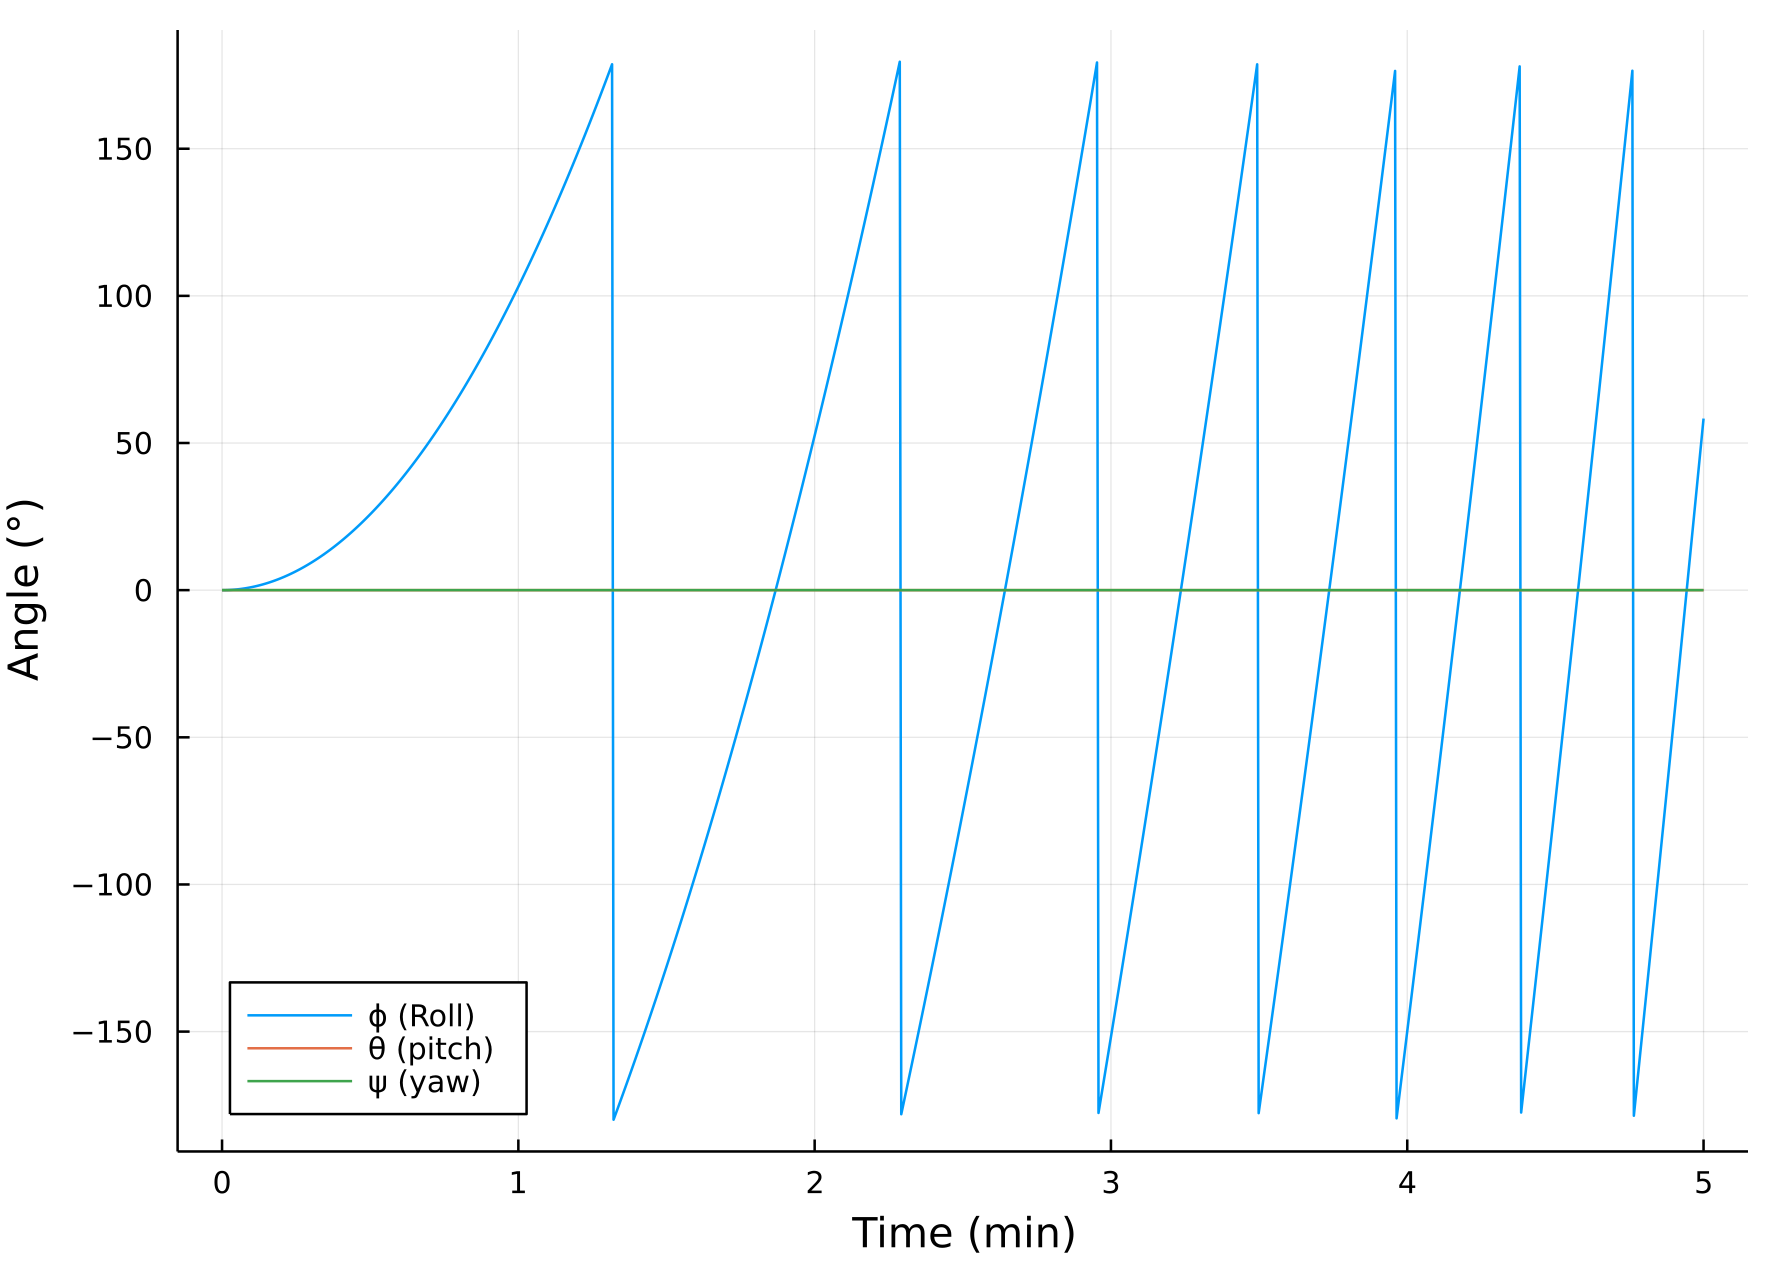

In [5]:
plot(times ./ 60, rad2deg.(roll_mod), label="ϕ (Roll)", xlabel="Time (min)", ylabel="Angle (°)", size=(700,500), legend=:bottomleft, fmt=:png, dpi=254)
plot!(times ./ 60, rad2deg.(pitch), label="θ (pitch)")
plot!(times ./ 60, rad2deg.(yaw), label="ψ (yaw)")